In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV

In [2]:
# directory path
directory_testing = "C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForPredictMethod"

# Check if the directory already exists
if not os.path.exists(directory_testing):
    # Create the directory
    os.makedirs(directory_testing)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

# directory path
directory_training = "C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForKMeansMethod"

# Check if the directory already exists
if not os.path.exists(directory_training):
    # Create the directory
    os.makedirs(directory_training)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

Directory already exists!
Directory already exists!


In [3]:
# Read baseline features
with open('C:/Users/Utente/Desktop/ClusteringICSE2label/Feature/Baseline/baselineFeatures.csv', 'r') as f:          

    reader = csv.reader(f, delimiter='t')
    head = ''
    lines = []
    
    #For each subject
    for i, line in enumerate(reader):
        #Save header
        if i == 0:
            head = line
        else:
            #Create the testing file
            with open('C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForPredictMethod/'+ str(i) + '.csv', 'w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(head)
                writer.writerow(line)
            file.close()
        
        #Save the data 
        lines.append(line)    

    
    to_write = []
    
    #For each subject
    for i in range(len(lines)):
        to_write = lines.copy()
        if i > 0:
            #Remove the subject who is in testing file
            to_write.remove(lines[i])
            #Create the training file
            with open('C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForKMeansMethod/'+ str(i) + '.csv', 'w', newline='') as file:
                    writer = csv.writer(file)
                    for line in to_write:
                        writer.writerow(line)
            file.close()
        
    f.close      

In [4]:
# Directory path
directory_clustering = "ids_in_cluster"

# Check if the directory already exists
if not os.path.exists(directory_clustering):
    # Create the directory
    os.makedirs(directory_clustering)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

Directory created successfully!


In [5]:
# Find id of subject in cluster 
def who_in_cluster(cluster_data, dataset):
    ids = []
    if len(cluster_data) == 0:
        return ids
    for data in dataset:
        for cluster_row in cluster_data:
            if np.array_equal(cluster_row, data[1:]):
                ids.append(int(data[0]))
                break
    return ids

def plot_clusters(datas, labels, centers, title, ids_cluster_1, ids_cluster_2):
    pca = PCA(n_components=2)
    datas_2d = pca.fit_transform(datas)
    
    # Plot points for each cluster with specific colors and labels
    plt.scatter(datas_2d[labels == 0, 0], datas_2d[labels == 0, 1], c='violet', label='Cluster 1')
    plt.scatter(datas_2d[labels == 1, 0], datas_2d[labels == 1, 1], c='green', label='Cluster 2')
    
    # Plot centroids
    centers_2d = pca.transform(centers)
    plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=300, c='red', alpha=0.5, label='Centroids')
    
    plt.legend()
    plt.title(title)
    plt.show()

    print(f"IDs of subjects in  {title} - Cluster 1: \n")
    print(ids_cluster_1)
    print("\n")

    print(f"IDs of subjects in {title} - Cluster 2: \n")
    print(ids_cluster_2)
    print("\n")



Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


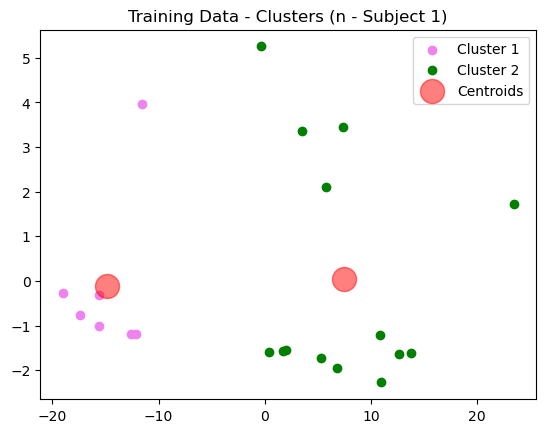

IDs of subjects in  Training Data - Clusters (n - Subject 1) - Cluster 1: 

[4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 1) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


Result of predict: 

Subject 1, Data Point 1 belongs to Cluster 2: 
[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


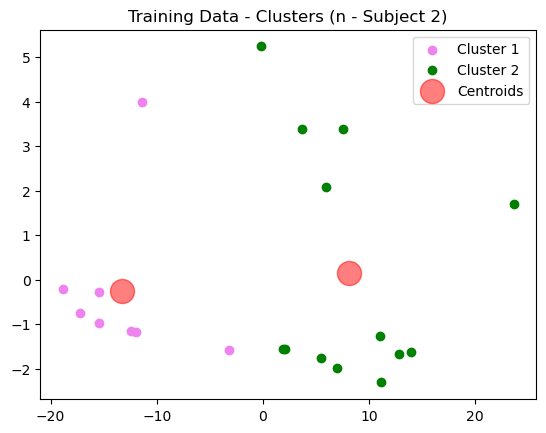

IDs of subjects in  Training Data - Clusters (n - Subject 2) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 2) - Cluster 2: 

[3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


Result of predict: 

Subject 2, Data Point 1 belongs to Cluster 2: 
[3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


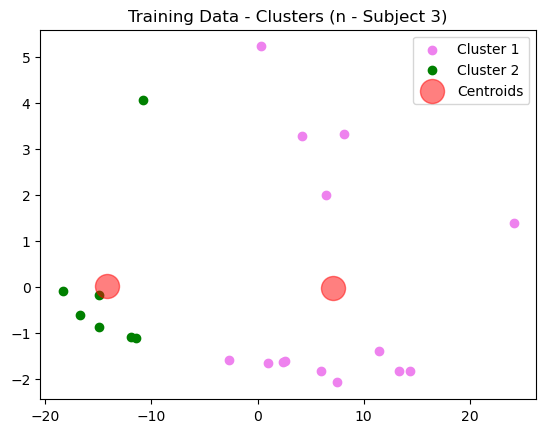

IDs of subjects in  Training Data - Clusters (n - Subject 3) - Cluster 1: 

[1, 2, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 3) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 3, Data Point 1 belongs to Cluster 1: 
[1, 2, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


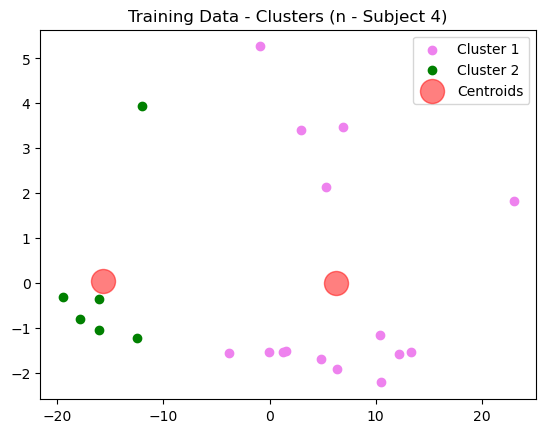

IDs of subjects in  Training Data - Clusters (n - Subject 4) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 4) - Cluster 2: 

[7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 4, Data Point 1 belongs to Cluster 2: 
[7, 9, 12, 17, 18, 21] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


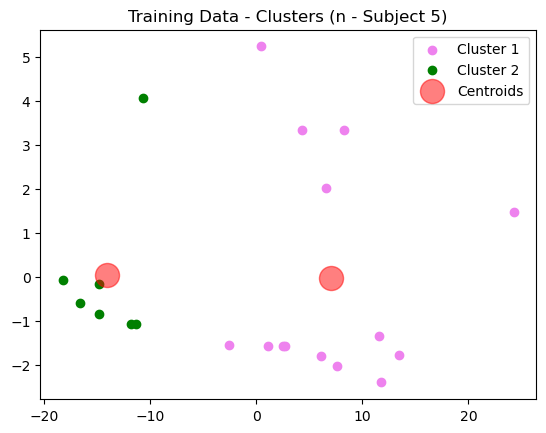

IDs of subjects in  Training Data - Clusters (n - Subject 5) - Cluster 1: 

[1, 2, 3, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 5) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 5, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


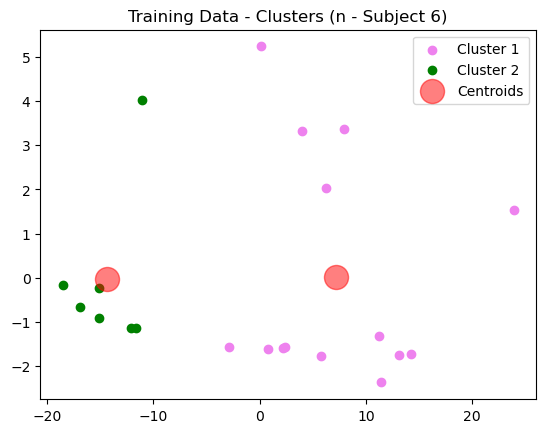

IDs of subjects in  Training Data - Clusters (n - Subject 6) - Cluster 1: 

[1, 2, 3, 5, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 6) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 6, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'random', 'n_clusters': 2, 'n_init': 10, 'random_state': 42}
Optimal number of clusters based on parameter grid: 2


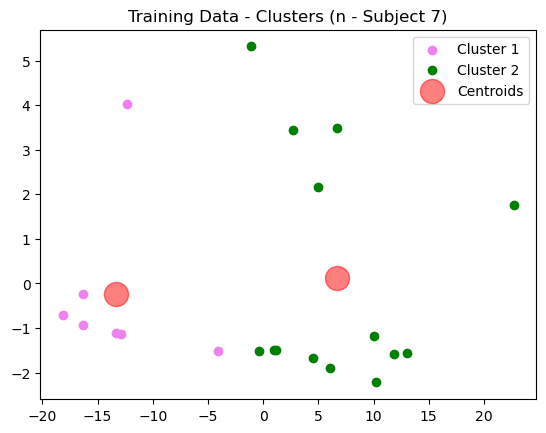

IDs of subjects in  Training Data - Clusters (n - Subject 7) - Cluster 1: 

[1, 4, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 7) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


Result of predict: 

Subject 7, Data Point 1 belongs to Cluster 1: 
[1, 4, 9, 12, 17, 18, 21] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


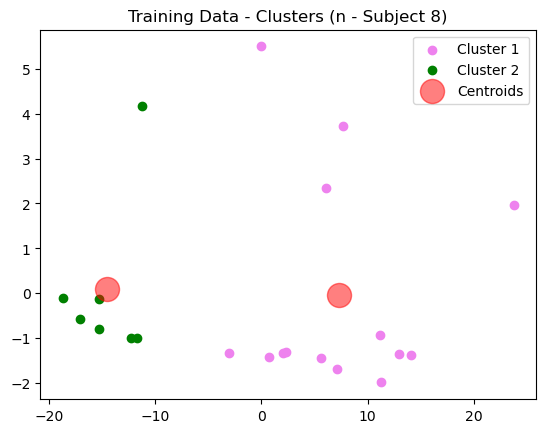

IDs of subjects in  Training Data - Clusters (n - Subject 8) - Cluster 1: 

[1, 2, 3, 5, 6, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 8) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 8, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 6, 10, 11, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


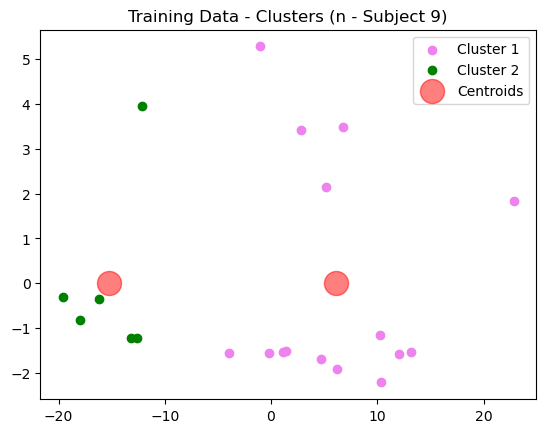

IDs of subjects in  Training Data - Clusters (n - Subject 9) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 9) - Cluster 2: 

[4, 7, 12, 17, 18, 21]


Result of predict: 

Subject 9, Data Point 1 belongs to Cluster 2: 
[4, 7, 12, 17, 18, 21] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


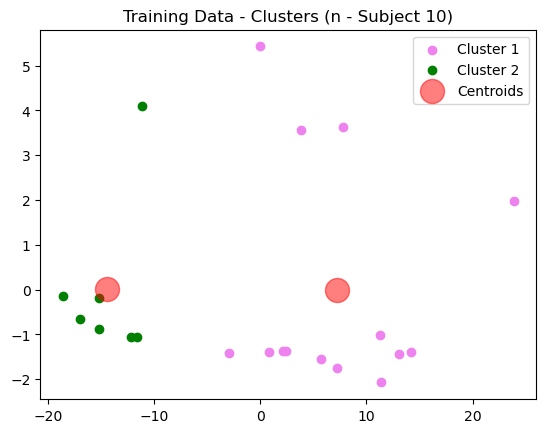

IDs of subjects in  Training Data - Clusters (n - Subject 10) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 10) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 10, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 6, 8, 11, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


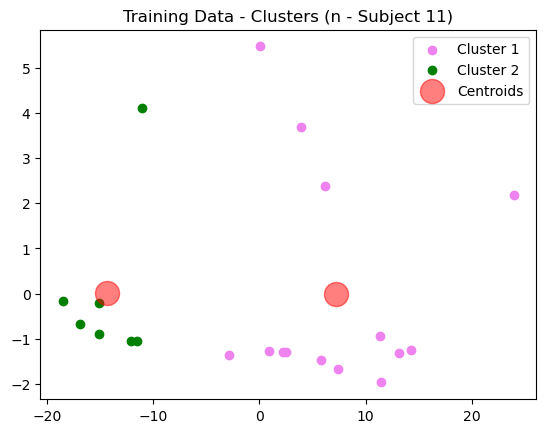

IDs of subjects in  Training Data - Clusters (n - Subject 11) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 11) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 11, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 6, 8, 10, 13, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


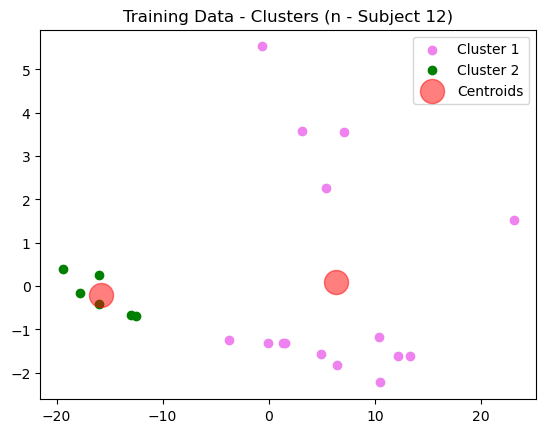

IDs of subjects in  Training Data - Clusters (n - Subject 12) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 12) - Cluster 2: 

[4, 7, 9, 17, 18, 21]


Result of predict: 

Subject 12, Data Point 1 belongs to Cluster 2: 
[4, 7, 9, 17, 18, 21] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


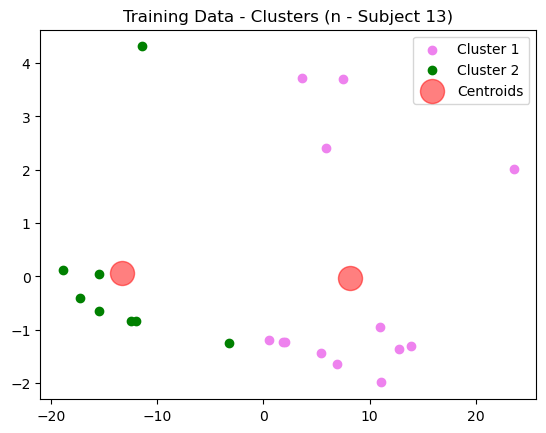

IDs of subjects in  Training Data - Clusters (n - Subject 13) - Cluster 1: 

[2, 3, 5, 6, 8, 10, 11, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 13) - Cluster 2: 

[1, 4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 13, Data Point 1 belongs to Cluster 1: 
[2, 3, 5, 6, 8, 10, 11, 14, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


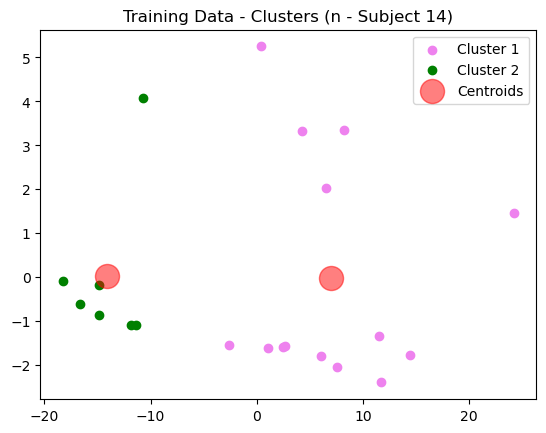

IDs of subjects in  Training Data - Clusters (n - Subject 14) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 14) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 14, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 6, 8, 10, 11, 13, 15, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


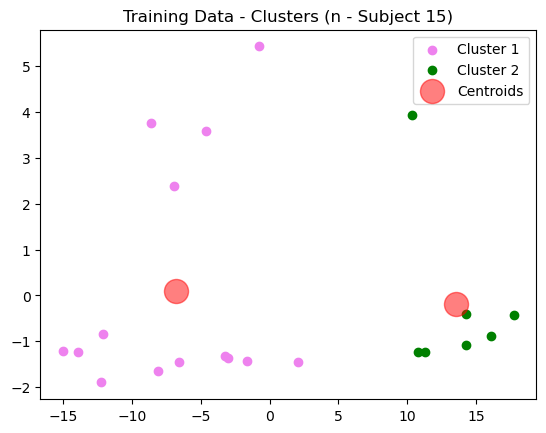

IDs of subjects in  Training Data - Clusters (n - Subject 15) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 15) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 15, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 16, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


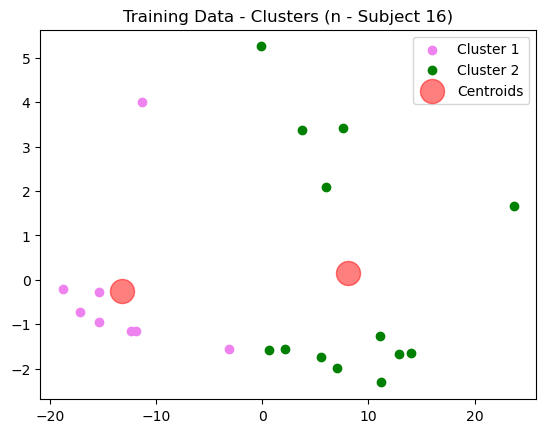

IDs of subjects in  Training Data - Clusters (n - Subject 16) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 16) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 19, 20, 22]


Result of predict: 

Subject 16, Data Point 1 belongs to Cluster 2: 
[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 19, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


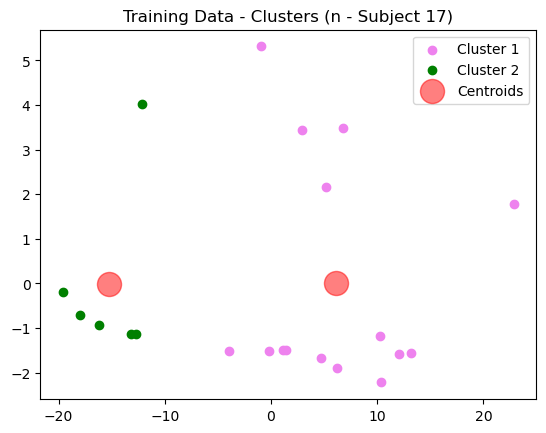

IDs of subjects in  Training Data - Clusters (n - Subject 17) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 17) - Cluster 2: 

[4, 7, 9, 12, 18, 21]


Result of predict: 

Subject 17, Data Point 1 belongs to Cluster 2: 
[4, 7, 9, 12, 18, 21] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


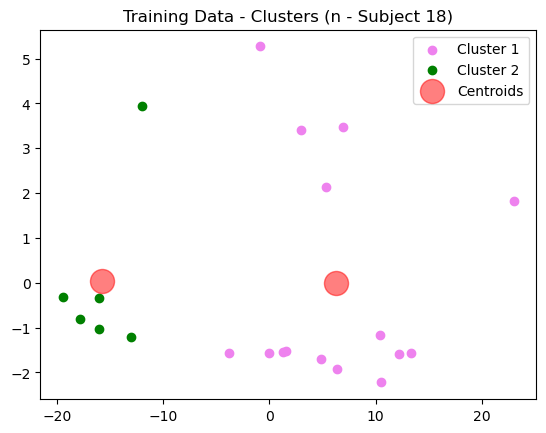

IDs of subjects in  Training Data - Clusters (n - Subject 18) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 18) - Cluster 2: 

[4, 7, 9, 12, 17, 21]


Result of predict: 

Subject 18, Data Point 1 belongs to Cluster 2: 
[4, 7, 9, 12, 17, 21] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


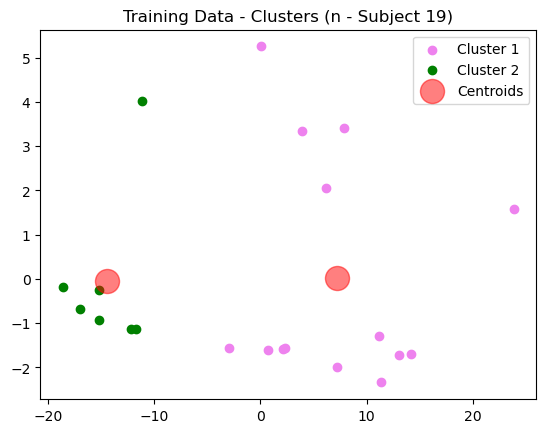

IDs of subjects in  Training Data - Clusters (n - Subject 19) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 19) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 19, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 20, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


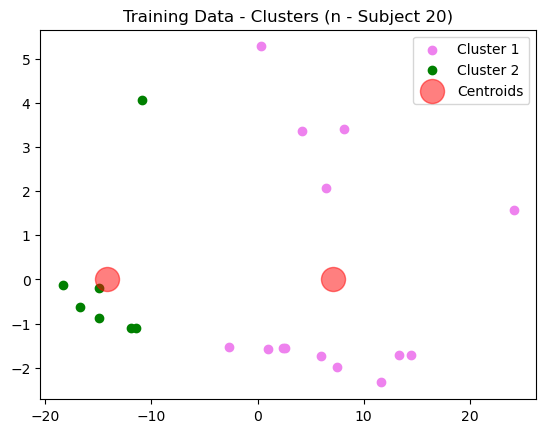

IDs of subjects in  Training Data - Clusters (n - Subject 20) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 22]


IDs of subjects in Training Data - Clusters (n - Subject 20) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Result of predict: 

Subject 20, Data Point 1 belongs to Cluster 1: 
[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 22] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


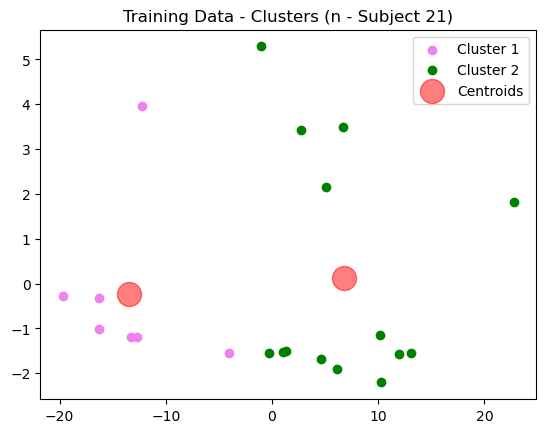

IDs of subjects in  Training Data - Clusters (n - Subject 21) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18]


IDs of subjects in Training Data - Clusters (n - Subject 21) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


Result of predict: 

Subject 21, Data Point 1 belongs to Cluster 1: 
[1, 4, 7, 9, 12, 17, 18] 


Result of KMeans: 

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0}
Optimal number of clusters based on parameter grid: 2


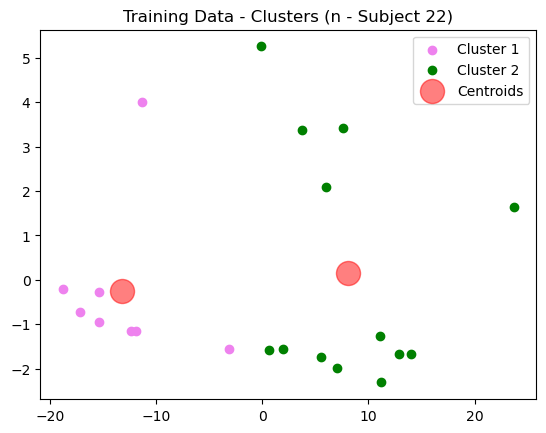

IDs of subjects in  Training Data - Clusters (n - Subject 22) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 22) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20]


Result of predict: 

Subject 22, Data Point 1 belongs to Cluster 2: 
[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20] 



In [13]:
# For each subject
for i in range(1, 23):
    dataset = np.empty([0, 5])

    # File for KMeans method
    with open(f'C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForKMeansMethod/{i}.csv', 'r') as f:
        reader_training = csv.reader(f, delimiter='\t')
        datas = np.empty([0, 4])
        
        for j, subject_training in enumerate(reader_training):
            # Ignore header
            if j > 0:
                # Split the data
                for z, line in enumerate(subject_training):
                    dat = [list(map(float, line.split(',')))]
                    # Remove id
                    dat_no_idx = np.delete(dat, 0, 1)
                    # dataset with id
                    dataset = np.append(dataset, dat, axis=0)
                    # dataset without id
                    datas = np.append(datas, dat_no_idx, axis=0)

            
        # Define the parameter grid
        param_grid = {
            'n_clusters': [2],
            'init': ['k-means++', 'random'],
            'n_init': [10, 15],
            'algorithm': ['lloyd', 'full', 'elkan'],
            'random_state': [0, 42, 100]
        }
        
        # Create the KMeans object
        kmeans = KMeans(random_state=42)

        # Perform grid search
        grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

        # Fit the grid search to the data
        grid_search.fit(datas)
        
        print("\nResult of KMeans: \n")
        # Print the best hyperparameters
        print("Best hyperparameters: ", grid_search.best_params_)
        print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))
        
        # KMeans with best_params
        kmeans = KMeans(n_clusters = 2, 
                init = grid_search.best_params_['init'], 
                n_init = 10,
                algorithm = grid_search.best_params_['algorithm'], 
                random_state= 42
                )
        kmeans.fit(datas)

        cluster_labels = kmeans.labels_
        cluster_1_indices = np.where(cluster_labels == 0)[0]
        cluster_2_indices = np.where(cluster_labels == 1)[0]
        
        # Get IDs of subjects in Cluster 1
        ids_cluster_1 = who_in_cluster(datas[cluster_1_indices], dataset)
        
        
        # Get IDs of subjects in Cluster 2
        ids_cluster_2 = who_in_cluster(datas[cluster_2_indices], dataset)


       # Combine cluster indices for plotting
        combined_indices = np.concatenate((cluster_1_indices, cluster_2_indices))
        combined_labels = np.concatenate((np.zeros(len(cluster_1_indices)), np.ones(len(cluster_2_indices))))
        
        # Plot clusters
        plot_clusters(datas[combined_indices], combined_labels, kmeans.cluster_centers_, f'Training Data - Clusters (n - Subject {i})', ids_cluster_1, ids_cluster_2)
    
    #File for predict method
    with open(f'C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForPredictMethod/{i}.csv', 'r') as f_test:
        reader_testing = csv.reader(f_test, delimiter='\t')
        datas_testing = np.empty([0, 4])
        dataset_testing = []
        predicted_data = []
        for x, subject_testing in enumerate(reader_testing):
            # Ignore header
            if x > 0:
                # Split the data
                for t, line in enumerate(subject_testing):
                    splitted = list(map(float, line.split(',')))
                    dataset_testing.append(splitted)  # Store the entire line
                    # Remove id
                    dat_test = np.delete([splitted], 0, 1)
                    # Create dataset without ids
                    datas_testing = np.append(datas_testing, dat_test, axis=0)
                    
        # Predict on testing data
        pred = kmeans.predict(datas_testing)    
        
        print("Result of predict: \n")
        for idx, label in enumerate(pred):
            print(f'Subject {i}, Data Point {idx+1} belongs to Cluster {label+1}: ')
        
        # Save predicted cluster data to file
        predicted_cluster = pred[0] + 1  # Adding 1 to make it 1-based indexing
        predicted_data = who_in_cluster(datas_testing, dataset_testing)
        
        #print(predicted_data)
        
        # IDs of subjects in Cluster 1
        if (predicted_cluster == 1):
            ids_cluster_1 = who_in_cluster(datas[cluster_1_indices], dataset)
            print(ids_cluster_1, "\n")

            # Salva gli ID nel file
            with open(f'ids_in_cluster/Run{i}_C1.csv', 'w', newline='') as file1:
                writer1 = csv.writer(file1)
                writer1.writerow(ids_cluster_1)

        # IDs of subjects in Cluster 2
        if (predicted_cluster == 2):
            ids_cluster_2 = who_in_cluster(datas[cluster_2_indices], dataset)
            print(ids_cluster_2, "\n")
            # Salva gli ID nel file
            with open(f'ids_in_cluster/Run{i}_C2.csv', 'w', newline='') as file2:
                writer2 = csv.writer(file2)
                writer2.writerow(ids_cluster_2)